# Lectura y limpieza de Database

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks/Modulo5"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Modulo5


In [2]:
!pip install matplotlib
!pip install pandas
!pip install pandas_datareader
!pip install dataprep
!pip install seaborn
!pip install statsmodels
!pip install scalecast
!pip install pmdarima
!pip install statsmodels


from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 4.1 MB/s 
     |████████████████████████████████| 1.0 MB 35.1 MB/s 
     |████████████████████████████████| 133 kB 55.4 MB/s 
     |████████████████████████████████| 749 kB 47.1 MB/s 
     |████████████████████████████████| 965 kB 48.0 MB/s 
     |████████████████████████████████| 28.5 MB 69.0 MB/s 
     |████████████████████████████████| 1.0 MB 51.1 MB/s 
     |████████████████████████████████| 101 kB 9.5 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... do

Primeramente procedo a importar los datos que obtuve de la pagina [Inegi.org](https://www.inegi.org.mx/app/indicadores/?t=95&ag=00#D95), enfocandome en el indice global de Actividad Economica de México

In [3]:
data = pd.read_csv('Indicadores20221007105052.csv')
dfData = pd.read_csv('Indicadores20221007105052.csv',names = data.columns)
dfDataW = dfData
dfDataW

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
0,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
1,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/07,111.2745518,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/06,112.7975011,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/05,114.4424238,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/04,109.5298659,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
...,...,...,...,...,...,...,...,...,...,...,...,...
351,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/05,63.61289973,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
352,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/04,61.86598396,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
353,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/03,63.94324936,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
354,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/02,61.02252106,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1


In [4]:
dfDataW.drop(index=dfDataW.index[0], axis=0, inplace=True)
dfDataW

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
1,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/07,111.2745518,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/06,112.7975011,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/05,114.4424238,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/04,109.5298659,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
5,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/03,111.9401523,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
...,...,...,...,...,...,...,...,...,...,...,...,...
351,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/05,63.61289973,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
352,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/04,61.86598396,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
353,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/03,63.94324936,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
354,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/02,61.02252106,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1


In [5]:
dfDataW['Periodo']

1      2022/07
2      2022/06
3      2022/05
4      2022/04
5      2022/03
        ...   
351    1993/05
352    1993/04
353    1993/03
354    1993/02
355    1993/01
Name: Periodo, Length: 355, dtype: object

In [6]:
s = dfDataW['Periodo']
dfDataW['Periodo'] = pd.to_datetime(s, infer_datetime_format=True)  
dfDataW['Periodo']

1     2022-07-01
2     2022-06-01
3     2022-05-01
4     2022-04-01
5     2022-03-01
         ...    
351   1993-05-01
352   1993-04-01
353   1993-03-01
354   1993-02-01
355   1993-01-01
Name: Periodo, Length: 355, dtype: datetime64[ns]

In [7]:
dfDataW

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
1,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-07-01,111.2745518,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-06-01,112.7975011,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-05-01,114.4424238,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-04-01,109.5298659,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
5,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-03-01,111.9401523,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
...,...,...,...,...,...,...,...,...,...,...,...,...
351,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-05-01,63.61289973,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
352,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-04-01,61.86598396,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
353,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-03-01,63.94324936,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
354,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-02-01,61.02252106,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1


In [8]:
dfDataW['Valor'] = dfDataW['Valor'].astype(float)
dfDataW['Valor']

1      111.274552
2      112.797501
3      114.442424
4      109.529866
5      111.940152
          ...    
351     63.612900
352     61.865984
353     63.943249
354     61.022521
355     60.407691
Name: Valor, Length: 355, dtype: float64

Despues de haber hecho toda la limpieza de datos necesaria para poder trabajar de manera esperada con este database procedo a realizar las pruebas correspondientes

# Pruebas estadísticas de estacionariedad

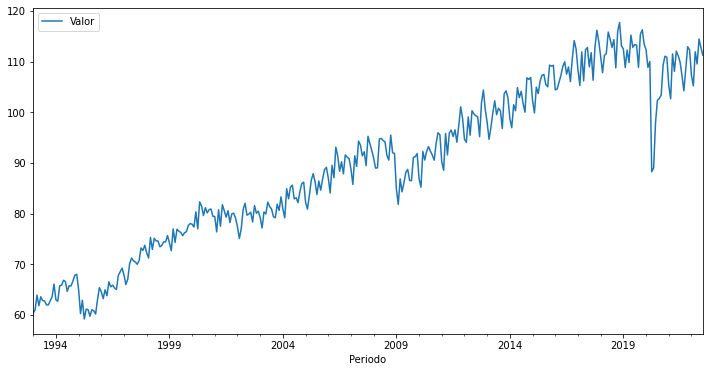

In [9]:
ax = dfDataW.plot(x='Periodo', y='Valor', figsize=(12,6))

In [10]:
dfPruebas = dfDataW[['Periodo', 'Valor']]
dfPruebas.set_index(['Periodo'], inplace = True)
dfPruebas

,Valor
Periodo,
2022-07-01,111.274552
2022-06-01,112.797501
2022-05-01,114.442424
2022-04-01,109.529866
2022-03-01,111.940152
...,...
1993-05-01,63.612900
1993-04-01,61.865984
1993-03-01,63.943249


In [11]:
#Perform augmented Dickey-Fuller test
adfuller(dfPruebas['Valor'])

(0.12319348265076839,
 0.9676094071068195,
 17,
 337,
 {'1%': -3.4499043309021955,
  '5%': -2.870154885338925,
  '10%': -2.5713597190254385},
 1506.6592538949058)

In [12]:
0.9676094071068195<0.05

False

Resultados de Dickey-Fuller test

    Test statistic: 0.12319348265076839
    P-value: 0.9676094071068195

Como podemos observar no solo por medio de la grafica del ploteo de datos, si no que ademas por medio de la prueba de Dickey-Fuller, se puede concluir que la linea de timepo no es estacionaria, por lo cual para poder trabar con esta procedermos a volverla estacionaria.

Para esto a continuacion transformaremos la variable de Value primero obteniendo el logaritmo de la misma

In [13]:
dfPruebasLog = pd.Series(np.log(dfPruebas['Valor'])).dropna()
dfPruebasLog

Periodo
2022-07-01    4.712001
2022-06-01    4.725594
2022-05-01    4.740072
2022-04-01    4.696197
2022-03-01    4.717964
                ...   
1993-05-01    4.152816
1993-04-01    4.124970
1993-03-01    4.157996
1993-02-01    4.111243
1993-01-01    4.101116
Name: Valor, Length: 355, dtype: float64

Primero realizamos la primera diferncial normal de la variable, donde por medio de nuevamente la prueba de Dickey-Fuller, podemos ver que esta linea de tiempo ya es estacional.

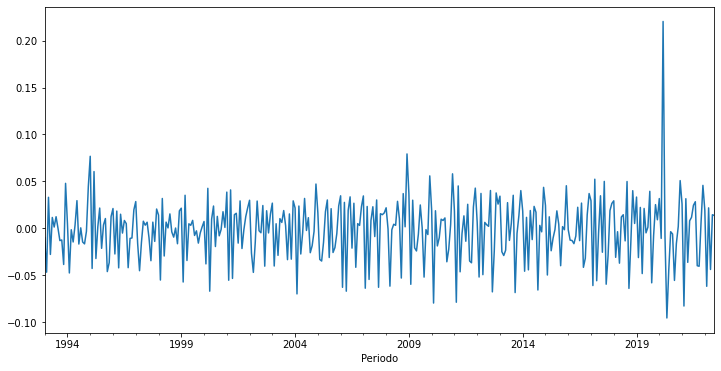

In [14]:
dfPruebasTransformed = dfPruebasLog.diff().dropna()

dfPruebasTransformed.plot(figsize=(12, 6));

In [15]:
adfuller(dfPruebasTransformed)

(-5.154448587019208,
 1.0883580348707864e-05,
 17,
 336,
 {'1%': -3.449962981927952,
  '5%': -2.870180642420163,
  '10%': -2.5713734527352607},
 -1528.1823248905755)

Resultados de Dickey-Fuller test

    Test statistic: -5.154448587019208
    P-value: 1.0883580348707864e-05

En este caso podemos ver que la graifca de tiempo, garcias a su P-value se puede concluior que si es estacionario razon por la cual ahora si podemos continuar trabajando con esta para nuestro modelo




Sin embargo en pro de las predicciones futuras de este modelo, procedo a sacar la primera diferencial en un periodo de 12, ya que estamos trabajon con datos mensuales de cada año, obteniendo asi nuestra linea de tiempo estacionaria.

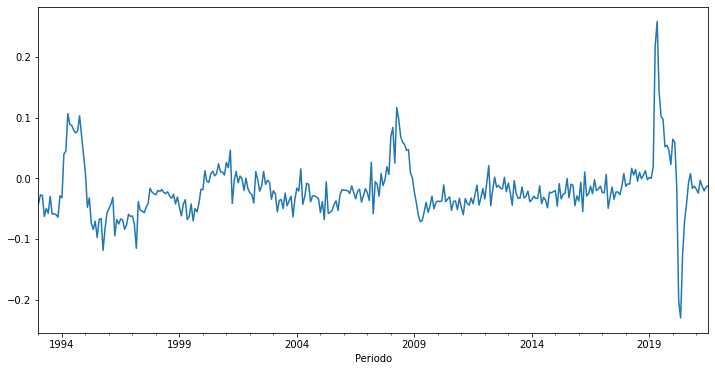

In [16]:
dfPruebasTransformedSeasonal = (dfPruebasLog.diff(12).dropna())

dfPruebasTransformedSeasonal.plot(figsize=(12, 6));

In [17]:
adfuller(dfPruebasTransformedSeasonal)

(-3.6773873470313796,
 0.004442700985986872,
 17,
 325,
 {'1%': -3.450632157720528,
  '5%': -2.870474482366864,
  '10%': -2.5715301325443787},
 -1542.6248502808344)

En este punto arreglo algunos cosas de mis dataframe ya que los datos de esta estaban de manera descendente y yo lo necesitaba de manera acendente

In [18]:
dfPruebasTransformedSeasonal

Periodo
2021-07-01   -0.012631
2021-06-01   -0.014522
2021-05-01   -0.021001
2021-04-01   -0.013414
2021-03-01   -0.003661
                ...   
1993-05-01   -0.049767
1993-04-01   -0.063042
1993-03-01   -0.028476
1993-02-01   -0.027647
1993-01-01   -0.042483
Name: Valor, Length: 343, dtype: float64

In [19]:
s = dfPruebasTransformedSeasonal

dfTransformed = s.to_frame(name="Valor")

dfTransformed

,Valor
Periodo,
2021-07-01,-0.012631
2021-06-01,-0.014522
2021-05-01,-0.021001
2021-04-01,-0.013414
2021-03-01,-0.003661
...,...
1993-05-01,-0.049767
1993-04-01,-0.063042
1993-03-01,-0.028476


In [20]:
dfTransformed = dfTransformed.sort_index(axis=0,ascending=True)
dfTransformed

,Valor
Periodo,
1993-01-01,-0.042483
1993-02-01,-0.027647
1993-03-01,-0.028476
1993-04-01,-0.063042
1993-05-01,-0.049767
...,...
2021-03-01,-0.003661
2021-04-01,-0.013414
2021-05-01,-0.021001


In [21]:
dfTransformed.columns

Index(['Valor'], dtype='object')

#  ACF and PACF 

The ACF is the auto-correlation plot, and the PACF is the partial autocorrelation plot. Both plots show auto*correlations between the variable and its own lags.

Una vez que confirmamos que nuestra serie de timepo es estacionaria, procedemos a hacer los graficos de AC(Autocerrelation) y PAC(Partial Autocorrelation), para con estos obtener los terminso AR y MA para nuestro modelo ARIMA/SARIMA

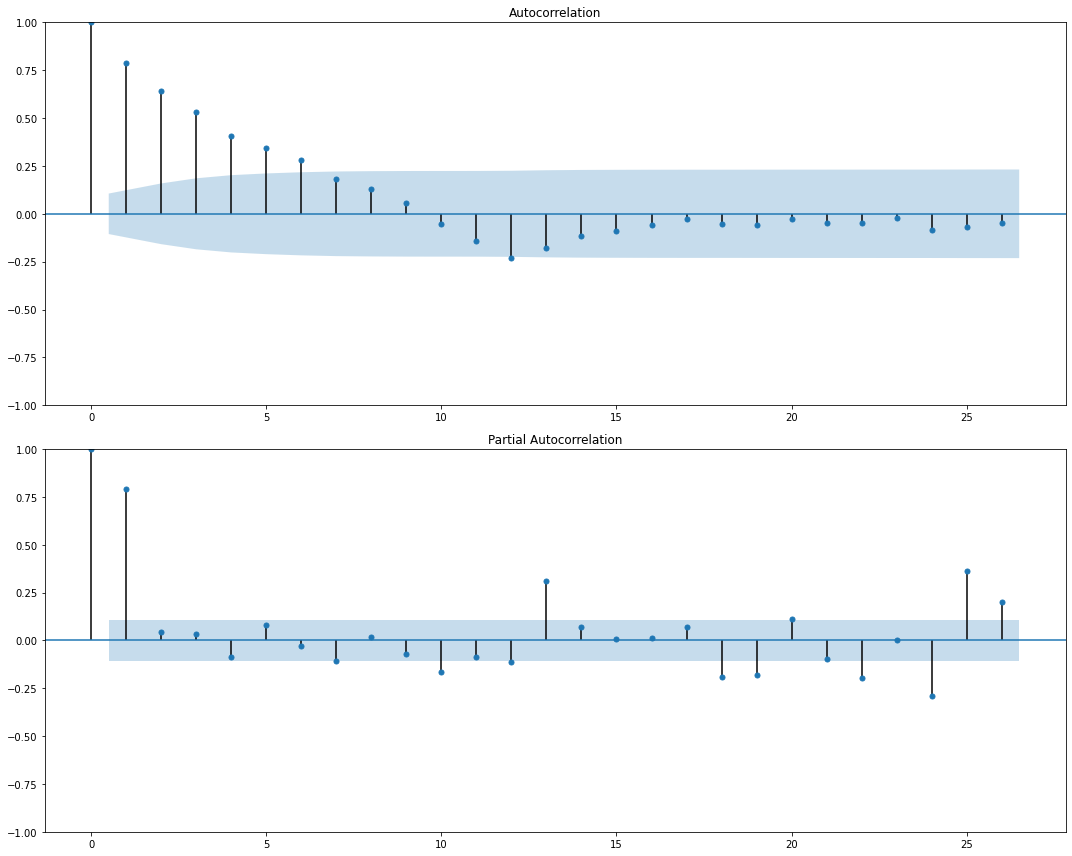

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
plot_acf(dfTransformed['Valor'], ax=ax[0])
plot_pacf(dfTransformed['Valor'], ax=ax[1], method='ols')

plt.tight_layout()
plt.show()

In [23]:
from statsmodels.graphics.tsaplots import acf
print(acf(dfTransformed['Valor']))

[ 1.          0.79047642  0.64147879  0.53244045  0.40779488  0.34500971
  0.27898463  0.18243636  0.1276219   0.05698009 -0.0537973  -0.14036262
 -0.23316974 -0.17860551 -0.114916   -0.09039653 -0.05635981 -0.02775208
 -0.05310755 -0.05756198 -0.02919748 -0.04619563 -0.04647523 -0.02265412
 -0.08392988 -0.06738621]


In [24]:
from statsmodels.graphics.tsaplots import pacf
print(pacf(dfTransformed['Valor']))

[ 1.          0.79278776  0.04503167  0.03488779 -0.08880298  0.0838832
 -0.03042485 -0.11107594  0.01422282 -0.07406228 -0.17394429 -0.09397316
 -0.1161817   0.321777    0.08015669 -0.00725111  0.00227709  0.06062888
 -0.1368061  -0.07932498  0.10625855 -0.10433406 -0.15018076  0.03358554
 -0.2190257   0.30046715]


Sabemos que el ACF muestra las autocorrelaciones (AC) entre la serie y sus rezagos, y el PACF muestra las autocorrelaciones parciales (PAC) entre la serie y sus rezagos.

Primeramente en nuestra grafica de 'autocorrelation', podemos ver que las primeras lineas verticales (1-6 aprox), parecen sobresalir de una manera considerable del areá horizontal azul la cual cubre el intervalo de confianza del 95% para las autocorrelaciones, por lo tanto, si la línea vertical cruza la línea punteada azul, significa que esa autocorrelación específica es SIGNIFICATIVAMENTE DIFERENTE DE CERO (puede ser positiva o negativa).

En el gráfico ACF veo que las primeras 6 ACs son positivas y significativas, y van decayendo gradualmente. Por ejemplo, el AC del LAG 1 es de aproximadamente de 1,00. 

En el caso del PACF, vemos autocorrelaciones PARTICULARES, que miden CUÁNTO MÁS está correlacionada la serie con cada uno de sus propios LAG, DESPUÉS DE CONSIDERAR el efecto de las AUTOCORRELACIONES de los LAG de orden inferior.

EN el PACF muestra que sólo las 2 primeras autocorrelaciones son positivas Y SINGULARES, y la magnitud de las siguientes autocorrelaciones baja a cero o a negativo muy rápidamente.

# Arima(p,d,q) 



*   p: refers to the number of autoregressive (AR) terms. Usually this parameter is either 0,1 or 2.
*   d: refers to how many first differences where needed to the series in order to make the series stationary. Usually this parameter is either 0 or 1.
*   q: refers to the number of moving average (MA) terms in the model. Usually this parameter is either 0,1 or 2.

p = 1 -> 2 (Posteriormente se calibro el 1 a 2, esto para aumentar la precision de nuestro modelo, esto se hizo a partir de pruebas con ayuda de la prueba de 'White Noise' y de la funcion [auto_arima](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html), para decidir cuales serian los mejores parametros para mi modelo de prediccion

d = 0

q = 1 

# Sarima(P,D,Q,#Periods)



*   P: refers to the number of SEASONAL autoregressive terms. Usually this parameter is either 0 or 1.
*   D: refers to how many SEASONAL differences were needed to the series to make the series stationary. Usually this parameter is either 0 or 1.
*   Q: refers to the number of SEASONAL moving average terms. Usually this parameter is either 0 or 1.
*   #periods: refers to the number of periods in the year. For example, if the data is monthly, then #periods=12.

P = 1

D = 0

Q = 2

Periods = 12

#  Estimate the ARIMA-SARIMA model

Primeramente procedo a realizar un Modelo Arima

In [25]:
model = ARIMA(dfTransformed, order = (2,0,1))
res = model.fit()

print(res.summary())

  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

  ConvergenceWarning)



                               SARIMAX Results                                
Dep. Variable:                  Valor   No. Observations:                  343
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 743.116
Date:                Wed, 23 Nov 2022   AIC                          -1476.231
Time:                        23:46:50   BIC                          -1457.043
Sample:                    01-01-1993   HQIC                         -1468.588
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0204      0.006     -3.700      0.000      -0.031      -0.010
ar.L1          1.7859      0.043     41.060      0.000       1.701       1.871
ar.L2         -0.7918      0.035    -22.547      0.0

In [26]:
sm.stats.acorr_ljungbox(res.resid, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,56.141508,1.128789e-07


Sin embargo como podemos observar no existe un ruido blanco (1.128789e-07 < 0.05) , por lo que este modelo no se ajustaria de buena manera para poder hacer una prediccion certera.

Por lo que ahora si pase a realizar el modelo SARIMAX, por el orden de (2,0,1) (1,0,1,12), que comente anteriormente en este entregable, fue el orden que me parecio que se ajustaba de mejor manera a mi serire de tiempo

In [27]:
mod = sm.tsa.statespace.SARIMAX(dfTransformed, order=(2,0,1), seasonal_order=(1, 0, 1, 12), enforce_stationarity=False, enforce_invertibility=False)

sarima_model = mod.fit()

print(sarima_model.summary())

  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

  ConvergenceWarning)



                                     SARIMAX Results                                      
Dep. Variable:                              Valor   No. Observations:                  343
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 772.517
Date:                            Wed, 23 Nov 2022   AIC                          -1533.035
Time:                                    23:46:52   BIC                          -1510.258
Sample:                                01-01-1993   HQIC                         -1523.948
                                     - 07-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5238      0.088     17.402      0.000       1.352       1.695
ar.L2         -0.5270      0.087   

Dentro del modelo podemos observar los resultados obtenidos de los coeficientes 'driff' de ar.L1 es postivo mientras que el de arL2 es neagtivo, sin embargo la suma de estos nos da un resultado menor a 0 por lo que nos mostraria como el modelo es estacionario.

Asi mismo en este modelo SARIMAX que es el que utilzo para mi modelo, contiene los coeficientes del polinomio de retardo de la media móvil donde se puede observar que estos tiene un valor negativo para ma.L1 de -0.7553

In [28]:
sarima_model.resid

Periodo
1993-01-01   -0.042483
1993-02-01    0.037089
1993-03-01   -0.008734
1993-04-01   -0.034219
1993-05-01    0.031293
                ...   
2021-03-01   -0.016839
2021-04-01   -0.020802
2021-05-01   -0.018255
2021-06-01    0.010273
2021-07-01    0.007201
Length: 343, dtype: float64

In [29]:
sm.stats.acorr_ljungbox(sarima_model.resid, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,19.107697,0.085962


Como podemos observar el resultado obtenido por la pruba de ruido blanco me da un valor >0.05, lo que me dice que mi modelo se ajusta bien, en el modelo se logro obtener un resultado en Log Likelihood  de 772.517, ademas de que la mayorio de los valor p dentro de mi modelo son <0.5 por lo que podemos concluir que estamos frente a un buen modelo

Con esto en mente procedo tambien a plotear el diagnosis de mis modelo, para poder observar de mejor manera los resultados interpretables de mi modelo



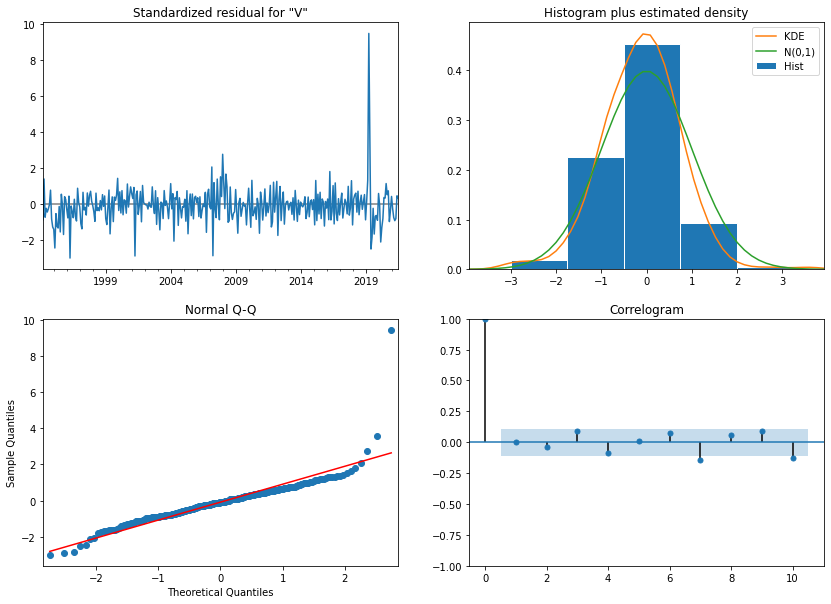

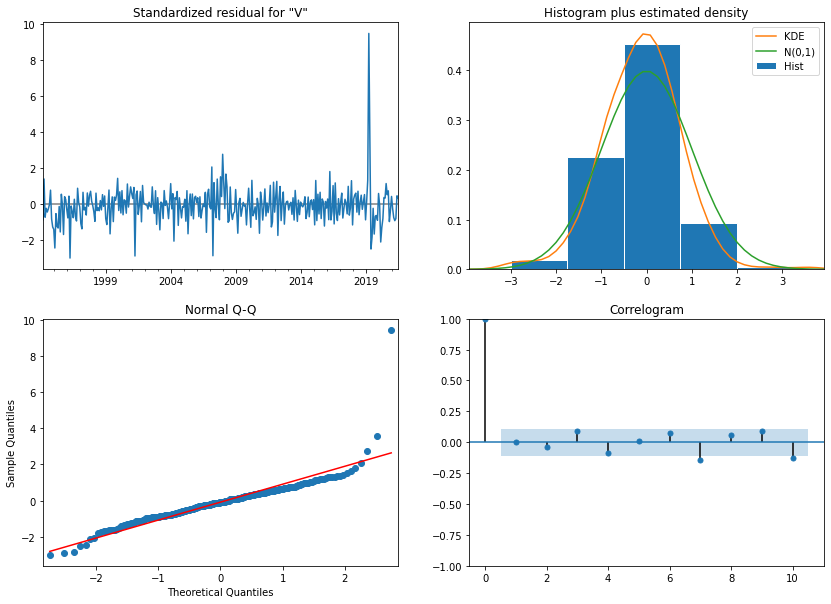

In [30]:
sarima_model.plot_diagnostics(figsize=(14,10))

Con los resultados obtenidos podemos realizar las siguiente predicciones sobre nuestro modelo.

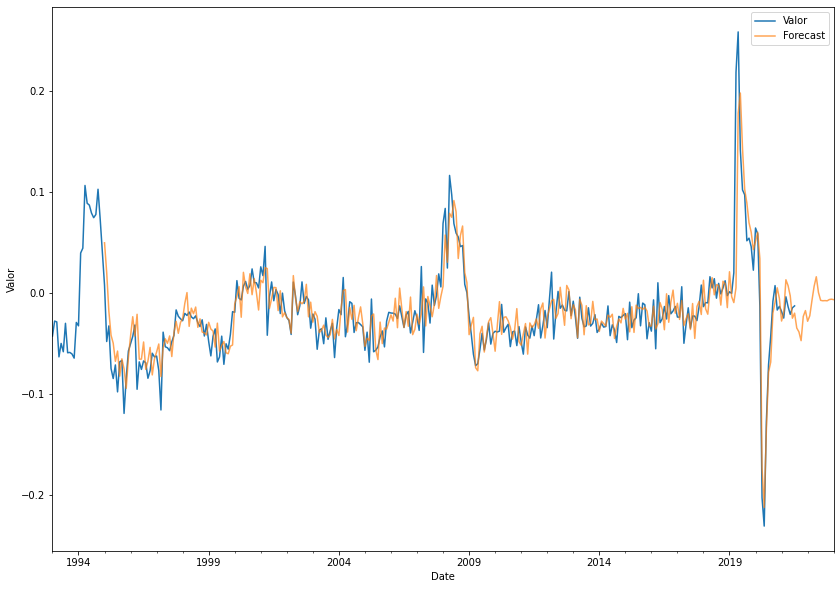

In [31]:
pred = sarima_model.get_prediction(start=pd.to_datetime('1995-01-01'), end=pd.to_datetime('2023-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = dfTransformed.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 10))
ax.set_xlabel('Date')
ax.set_ylabel('Valor')
plt.legend()
plt.show()

In [32]:
dfDataPrediccion = dfDataW
dfDataPrediccion = dfDataPrediccion.sort_index(axis=0,ascending=False)
dfDataPrediccion

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
355,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-01-01,60.407691,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
354,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-02-01,61.022521,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
353,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-03-01,63.943249,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
352,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-04-01,61.865984,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
351,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-05-01,63.612900,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
...,...,...,...,...,...,...,...,...,...,...,...,...
5,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-03-01,111.940152,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-04-01,109.529866,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-05-01,114.442424,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-06-01,112.797501,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1


In [39]:
dfForecast = pd.DataFrame(sarima_model.forecast(24))
dfForecast = np.exp(dfForecast).reset_index(drop=True)
dfForecast['Valor'] = dfDataPrediccion["Valor"].tail(24).reset_index(drop=True)
dfForecast['lag12']= dfForecast['predicted_mean'].shift(12)

dfForecast['Forecast'] = pd.DataFrame(dfForecast['predicted_mean'] + dfForecast['lag12'])
dfForecast['Forecast'] = pd.DataFrame(dfForecast['predicted_mean'] + dfForecast['Valor'])

dfForecast['Periodo'] = pd.date_range(start='2022-07-01', periods=24, freq='M')
dfForecast['Periodo'] = pd.to_datetime(dfForecast['Periodo'])

dfForecast


,predicted_mean,Valor,lag12,Forecast,Periodo
0,0.966058,102.742028,NaN,103.708086,2022-07-31
1,0.962396,103.368393,NaN,104.330789,2022-08-31
2,0.954069,109.270195,NaN,110.224264,2022-09-30
3,0.977237,111.065784,NaN,112.043022,2022-10-31
4,0.982864,110.848978,NaN,111.831842,2022-11-30
5,0.972544,105.356736,NaN,106.329280,2022-12-31
6,0.977805,102.666264,NaN,103.644069,2023-01-31
7,0.992679,111.531140,NaN,112.523819,2023-02-28
8,1.006715,108.070442,NaN,109.077157,2023-03-31
9,1.016301,112.064049,NaN,113.080350,2023-04-30


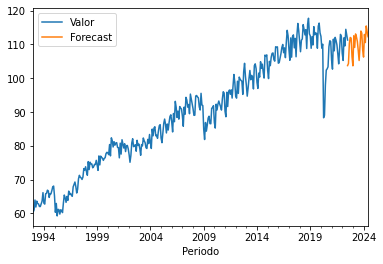

In [40]:
ax = dfDataPrediccion.plot('Periodo' , 'Valor' )
dfForecast.plot('Periodo' , 'Forecast' ,ax=ax)

In [35]:
pred = sarima_model.get_prediction(start=pd.to_datetime('2021-03-01'), end=pd.to_datetime('2021-07-01'), dynamic=False)
pred_t= pred.predicted_mean
pred_t

test = dfTransformed.tail()
test

mean_squared_error = np.sqrt(mean_squared_error(test, pred_t))

print(f'MSE: {mean_squared_error}')

MSE: 0.015536462308112526
